In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv", encoding="latin1")
df.head()

C:\Users\Bhavya\AppData\Local\Temp\ipykernel_27936\1249397496.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", encoding="latin1")


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [3]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [4]:
x = pd.to_numeric(df["no2"], errors="coerce")
x = x.dropna()
x = x.values

In [5]:
r = 102303560

ar = 0.05 * (r % 7)
br = 0.3 * ((r % 5) + 1)

print(ar, br)

0.1 0.3


In [6]:
x_scaled = x / np.max(np.abs(x))

In [7]:
z = x + ar * np.arcsin(br * x_scaled)

In [8]:
mu = np.mean(z)
var = np.var(z)
lam = 1 / (2 * var)
c = np.sqrt(lam / np.pi)
print("mu =", mu)
print("lambda =", lam)
print("c =", c)

mu = 25.81050683398822
lambda = 0.0014603364518799452
c = 0.02156013751783476


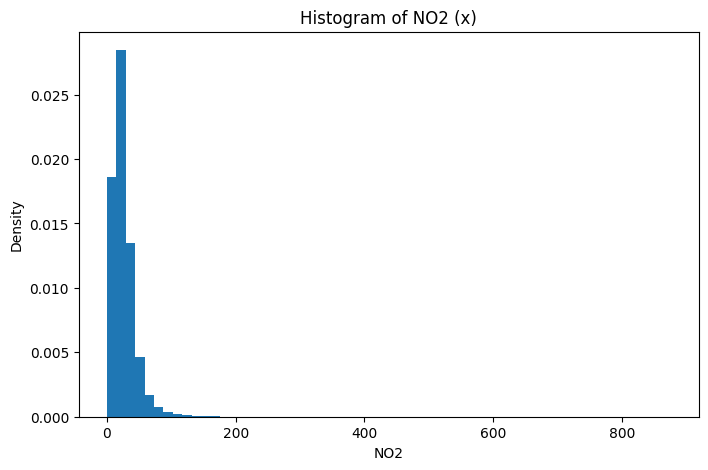

In [9]:
plt.figure(figsize=(8,5))
plt.hist(x, bins=60, density=True)
plt.title("Histogram of NO2 (x)")
plt.xlabel("NO2")
plt.ylabel("Density")
plt.show()

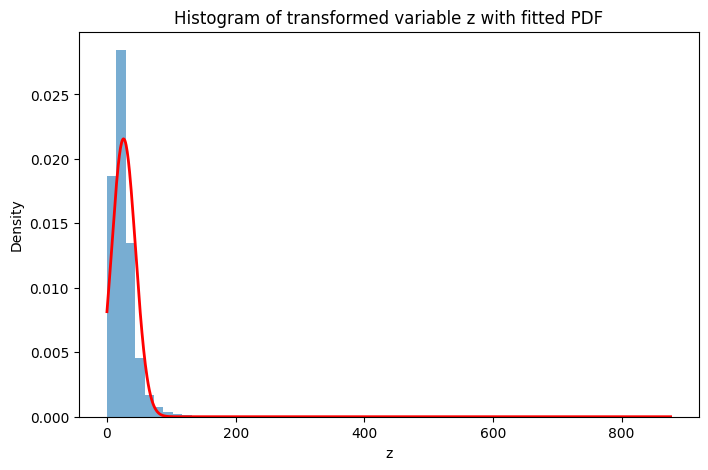

In [10]:
plt.figure(figsize=(8,5))
plt.hist(z, bins=60, density=True, alpha=0.6)
xx = np.linspace(z.min(), z.max(), 1000)
yy = c * np.exp(-lam * (xx - mu)**2)
plt.plot(xx, yy, color='red', linewidth=2)
plt.title("Histogram of transformed variable z with fitted PDF")
plt.xlabel("z")
plt.ylabel("Density")
plt.show()